In [ ]:
!pip install ultralytics torch torchvision --extra-index-url https://download.pytorch.org/whl/cu117
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitli

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# %% [markdown]
# ## 2. Verify Dataset Structure
# %%
import os

def verify_dataset_structure(base_path):
    splits = ['train', 'valid', 'test']
    required_folders = ['images', 'labels']

    for split in splits:
        split_path = os.path.join(base_path, split)
        for folder in required_folders:
            folder_path = os.path.join(split_path, folder)
            if not os.path.exists(folder_path):
                raise FileNotFoundError(f"Missing folder: {folder_path}")
            num_files = len(os.listdir(folder_path))
            print(f"{split}/{folder}: {num_files} files")


In [ ]:
# Update this path to your dataset location
verify_dataset_structure("/content/drive/MyDrive/Dataset")

train/images: 3589 files
train/labels: 3589 files
valid/images: 1025 files
valid/labels: 1025 files
test/images: 513 files
test/labels: 513 files


In [ ]:
# %% [markdown]
# ## 3. Load and Inspect Data Configuration
# %%
from ultralytics import YOLO
import yaml

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Load data.yaml
with open('/content/drive/MyDrive/Dataset/data.yaml', 'r') as f:
    data_config = yaml.safe_load(f)

print("Dataset Configuration:")
print(f"Classes: {data_config['names']}")
print(f"Number of Classes: {data_config['nc']}")

Dataset Configuration:
Classes: ['Mask', 'can', 'cellphone', 'electronics', 'gbottle', 'glove', 'metal', 'misc', 'net', 'pbag', 'pbottle', 'plastic', 'rod', 'sunglasses', 'tire']
Number of Classes: 15


In [ ]:
# Initialize model (using YOLOv8 Medium for better accuracy)
model = YOLO("/content/drive/MyDrive/Dataset/runs/detect/train2/weights/last.pt")  # Switch to yolov8l.pt for larger models

# Train with custom parameters
results = model.train(
    data="/content/drive/MyDrive/Dataset/data.yaml",
    epochs=20,
    imgsz=640,
    batch=16,
    lr0=0.01,
    optimizer="AdamW",
    device=0,  # GPU
    name="underwater_waste_v2",
    patience=20,
    augment=True,  # Enable mosaic augmentation
    dropout=0.2,   # Regularization
    weight_decay=0.0005
)

Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Dataset/runs/detect/train2/weights/last.pt, data=/content/drive/MyDrive/Dataset/data.yaml, epochs=20, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=underwater_waste_v2, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False,

100%|██████████| 755k/755k [00:00<00:00, 22.5MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

100%|██████████| 5.35M/5.35M [00:00<00:00, 104MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Dataset/train/labels.cache... 3589 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3589/3589 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.4' (you have '2.0.3'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Dataset/valid/labels.cache... 1025 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1025/1025 [00:00<?, ?it/s]


Plotting labels to runs/detect/underwater_waste_v2/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/underwater_waste_v2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.39G      1.918      3.246       2.01         17        640: 100%|██████████| 225/225 [17:41<00:00,  4.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [03:59<00:00,  7.27s/it]


                   all       1025       2223      0.337     0.0097      0.002   0.000566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.36G      2.008      3.348      2.115         36        640: 100%|██████████| 225/225 [01:20<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:14<00:00,  2.35it/s]


                   all       1025       2223      0.452     0.0677     0.0276     0.0115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.26G      1.917      3.135      2.019         33        640: 100%|██████████| 225/225 [01:22<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:16<00:00,  2.02it/s]


                   all       1025       2223      0.497      0.084     0.0416     0.0186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.54G      1.841      2.996      1.968         15        640: 100%|██████████| 225/225 [01:19<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:14<00:00,  2.35it/s]


                   all       1025       2223      0.616      0.126     0.0737     0.0357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.55G       1.79       2.87      1.912         41        640: 100%|██████████| 225/225 [01:21<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:13<00:00,  2.42it/s]


                   all       1025       2223      0.596      0.161      0.124     0.0643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.37G      1.728      2.766      1.856         24        640: 100%|██████████| 225/225 [01:21<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:13<00:00,  2.39it/s]


                   all       1025       2223      0.389      0.204      0.158      0.083

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.49G      1.709      2.682      1.841         20        640: 100%|██████████| 225/225 [01:22<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:13<00:00,  2.41it/s]


                   all       1025       2223      0.613      0.186      0.148     0.0768

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.29G      1.667      2.607      1.815         19        640: 100%|██████████| 225/225 [01:20<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:13<00:00,  2.38it/s]


                   all       1025       2223      0.635      0.201      0.161     0.0837

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.48G      1.642      2.521      1.789         39        640: 100%|██████████| 225/225 [01:22<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:13<00:00,  2.42it/s]


                   all       1025       2223      0.576      0.225      0.196      0.114

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.39G      1.594      2.464      1.752         19        640: 100%|██████████| 225/225 [01:20<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:13<00:00,  2.43it/s]


                   all       1025       2223      0.544       0.21      0.202      0.117
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.42G      1.619      2.332       1.87         15        640: 100%|██████████| 225/225 [01:21<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:13<00:00,  2.43it/s]


                   all       1025       2223      0.835      0.211       0.24      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.38G      1.597      2.227       1.85         19        640: 100%|██████████| 225/225 [01:15<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:14<00:00,  2.34it/s]


                   all       1025       2223      0.667      0.253      0.249      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.42G      1.562      2.107      1.803          6        640: 100%|██████████| 225/225 [01:19<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:13<00:00,  2.43it/s]


                   all       1025       2223      0.716      0.251      0.279       0.17

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.49G      1.545      2.056        1.8         11        640: 100%|██████████| 225/225 [01:17<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:12<00:00,  2.59it/s]


                   all       1025       2223      0.732      0.277      0.295       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.43G       1.52      1.963      1.767          8        640: 100%|██████████| 225/225 [01:16<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:13<00:00,  2.48it/s]


                   all       1025       2223        0.7      0.297      0.322        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.37G      1.488       1.93       1.74         17        640: 100%|██████████| 225/225 [01:17<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:13<00:00,  2.51it/s]


                   all       1025       2223      0.715      0.305      0.322      0.199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.36G      1.453      1.849      1.712          8        640: 100%|██████████| 225/225 [01:18<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:13<00:00,  2.51it/s]


                   all       1025       2223      0.684       0.32       0.35      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.37G      1.436      1.763      1.688         10        640: 100%|██████████| 225/225 [01:17<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:13<00:00,  2.49it/s]


                   all       1025       2223      0.719      0.336      0.347      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.46G      1.422      1.709      1.686         11        640: 100%|██████████| 225/225 [01:17<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:13<00:00,  2.48it/s]


                   all       1025       2223      0.798      0.321      0.384      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.36G      1.393      1.645       1.65         10        640: 100%|██████████| 225/225 [01:15<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:13<00:00,  2.49it/s]


                   all       1025       2223      0.725      0.342      0.396      0.251

20 epochs completed in 0.862 hours.
Optimizer stripped from runs/detect/underwater_waste_v2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/underwater_waste_v2/weights/best.pt, 6.3MB

Validating runs/detect/underwater_waste_v2/weights/best.pt...
Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:16<00:00,  1.96it/s]


                   all       1025       2223      0.757       0.34      0.407      0.268
                  Mask        114        299       0.62      0.729      0.766      0.506
                   can         23         28          1          0      0.032     0.0157
             cellphone         64         73      0.824       0.74      0.875      0.682
           electronics         30         46       0.53      0.416      0.441       0.23
               gbottle         45         81      0.394      0.185      0.265      0.161
                 glove         92        258      0.766      0.783      0.838      0.635
                 metal          7          8          1          0      0.017    0.00823
                  misc         52         55      0.451     0.0182      0.111     0.0621
                   net        132        137      0.711       0.61      0.662      0.395
                  pbag        280        341      0.799      0.783      0.869      0.688
               pbottl

In [ ]:
model = YOLO("/content/drive/MyDrive/Dataset/runs/detect/train2/weights/best.pt")


image 1/1 /content/drive/MyDrive/Dataset/test/images/1601024846172-gettyimagkjhes-1-227745665_jpeg_jpg.rf.84775169c2cab49bfd5b155051562b2e.jpg: 640x640 3 Masks, 1 glove, 11.5ms
Speed: 4.3ms preprocess, 11.5ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


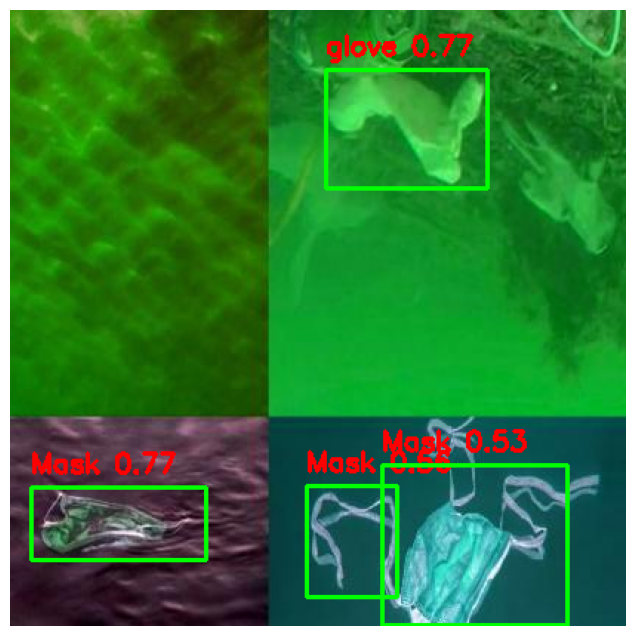

Output image saved to: output_image.jpg


In [ ]:
import cv2
import matplotlib.pyplot as plt

def predict_and_visualize(image_path, save_path=None):
    # Run inference
    results = model.predict(image_path, conf=0.5, save=False)

    # Plot results
    img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    for box in results[0].boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cls_id = int(box.cls[0])
        conf = box.conf[0].item()

        # Draw bounding box
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        label = f"{model.names[cls_id]} {conf:.2f}"
        cv2.putText(img, label, (x1, y1-10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    # Display the image
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Save the output image if save_path is provided
    if save_path:
        img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Convert back to BGR for saving
        cv2.imwrite(save_path, img_bgr)
        print(f"Output image saved to: {save_path}")

# Test on a new image (replace with your image path)
predict_and_visualize("/content/drive/MyDrive/Dataset/test/images/1601024846172-gettyimagkjhes-1-227745665_jpeg_jpg.rf.84775169c2cab49bfd5b155051562b2e.jpg", save_path="output_image.jpg")


image 1/1 /content/drive/MyDrive/Dataset/test/images/1601024846172-gettyimagkjhes-1-227745665_jpeg_jpg.rf.84775169c2cab49bfd5b155051562b2e.jpg: 640x640 3 Masks, 1 glove, 9.9ms
Speed: 4.1ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


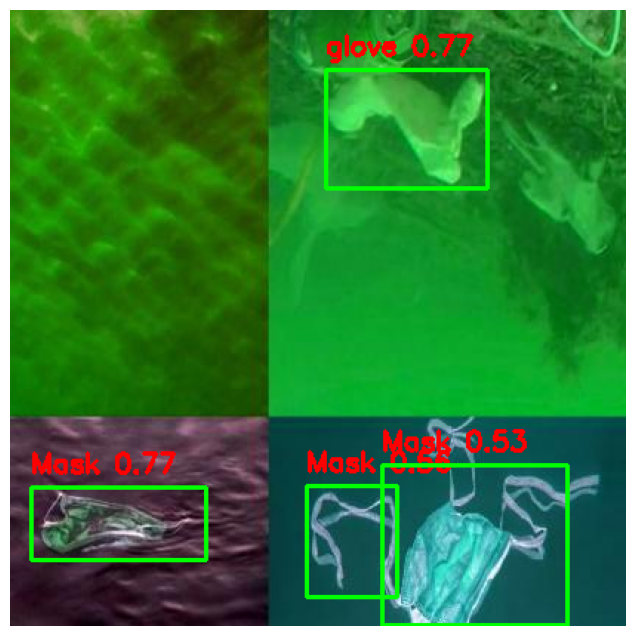

In [ ]:
# Test on a new image (replace with your image path)
predict_and_visualize("/content/drive/MyDrive/Dataset/test/images/1601024846172-gettyimagkjhes-1-227745665_jpeg_jpg.rf.84775169c2cab49bfd5b155051562b2e.jpg")

In [ ]:
# ## 5. Evaluate Model Performance
# %%
# Load best checkpoint
model = YOLO("/content/runs/detect/underwater_waste_v2/weights/best.pt")

# Validate on test set
metrics = model.val(
    data="/content/drive/MyDrive/Dataset/data.yaml",
    split="test",
    conf=0.5,  # Confidence threshold
    iou=0.5    # IoU threshold
)

print(f"""
Test Results:
- mAP@0.5: {metrics.box.map:.3f}
- Precision: {metrics.box.mp:.3f}
- Recall: {metrics.box.mr:.3f}
""")


Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Dataset/test/labels.cache... 513 images, 0 backgrounds, 0 corrupt: 100%|██████████| 513/513 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:30<00:00,  1.09it/s]


                   all        513       1123      0.536      0.302       0.43      0.306
                  Mask         57        153      0.821      0.569       0.72      0.502
                   can         20         26          0          0          0          0
             cellphone         30         33      0.966      0.848      0.919      0.751
           electronics         13         16      0.833      0.312      0.599      0.417
               gbottle         28         54      0.789      0.278      0.535      0.317
                 glove         47        117      0.889      0.615      0.779      0.628
                 metal          2          2          0          0          0          0
                  misc         26         26          0          0          0          0
                   net         60         62      0.788      0.419      0.627      0.351
                  pbag        150        174      0.852      0.759      0.839      0.703
               pbottl

In [ ]:
# %% [markdown]
# ## 7. Export Model for Deployment
# %%
# Export to ONNX (for CPU/GPU)
model.export(format="onnx", dynamic=True, simplify=True)

# Export to TensorRT (for NVIDIA GPUs)
model.export(format="engine", device=0)

Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from '/content/runs/detect/underwater_waste_v2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 19, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 176.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 kB 223.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 MB 222.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 235.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 302.2 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 20.6s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.

'/content/runs/detect/underwater_waste_v2/weights/best.engine'

In [ ]:
# ## 5. Evaluate Model Performance
# %%
# Load best checkpoint
model = YOLO("runs/detect/underwater_waste_v2/weights/best.pt")

# Validate on test set
metrics = model.val(
    split="test",
    conf=0.5,  # Confidence threshold
    iou=0.5    # IoU threshold
)

print(f"""
Test Results:
- mAP@0.5: {metrics.box.map:.3f}
- Precision: {metrics.box.precision.mean():.3f}
- Recall: {metrics.box.recall.mean():.3f}
""")

# %% [markdown]
# ## 6. Inference on Unlabeled Images
# %%
import cv2
import matplotlib.pyplot as plt

def predict_and_visualize(image_path):
    # Run inference
    results = model.predict(image_path, conf=0.5, save=False)

    # Plot results
    img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    for box in results[0].boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cls_id = int(box.cls[0])
        conf = box.conf[0].item()

        # Draw bounding box
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        label = f"{model.names[cls_id]} {conf:.2f}"
        cv2.putText(img, label, (x1, y1-10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Test on a new image (replace with your image path)
predict_and_visualize("test_image.jpg")

# %% [markdown]
# ## 7. Export Model for Deployment
# %%
# Export to ONNX (for CPU/GPU)
model.export(format="onnx", dynamic=True, simplify=True)

# Export to TensorRT (for NVIDIA GPUs)
model.export(format="engine", device=0)

# %% [markdown]
# ## 8. Load Exported Model and Run Inference
# %%
# Load ONNX model
onnx_model = YOLO("runs/detect/underwater_waste_v2/weights/best.onnx")

# Inference with exported model
results = onnx_model.predict("test_image.jpg", conf=0.5)
print("Predictions:", results[0].verbose())

In [ ]:
import locale
locale.getpreferredencoding = lambda: 'UTF-8'

# Now run your zip command
get_ipython().system('zip -r /content/file.zip /content/runs')

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/underwater_waste_v2/ (stored 0%)
  adding: content/runs/detect/underwater_waste_v2/confusion_matrix_normalized.png (deflated 16%)
  adding: content/runs/detect/underwater_waste_v2/results.csv (deflated 57%)
  adding: content/runs/detect/underwater_waste_v2/labels_correlogram.jpg (deflated 35%)
  adding: content/runs/detect/underwater_waste_v2/val_batch0_labels.jpg (deflated 8%)
  adding: content/runs/detect/underwater_waste_v2/val_batch0_pred.jpg (deflated 8%)
  adding: content/runs/detect/underwater_waste_v2/val_batch2_pred.jpg (deflated 7%)
  adding: content/runs/detect/underwater_waste_v2/train_batch0.jpg (deflated 3%)
  adding: content/runs/detect/underwater_waste_v2/train_batch1.jpg (deflated 3%)
  adding: content/runs/detect/underwater_waste_v2/results.png (deflated 7%)
  adding: content/runs/detect/underwater_waste_v2/val_batch1_pred.jpg (deflated 8%)
  adding: content/ru

In [ ]:
model = YOLO("/content/runs/detect/underwater_waste_v2/weights/best.pt")

In [ ]:
results = model.train(
    data="/content/drive/MyDrive/DeepTrash-Yolov5/data.yaml",
    epochs=25,
    imgsz=640,
    batch=16,
    lr0=0.01,
    optimizer="AdamW",
    device=0,  # GPU
    name="underwater_waste_v3",
    patience=20,
    augment=True,  # Enable mosaic augmentation
    dropout=0.2,   # Regularization
    weight_decay=0.0005
)

Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/underwater_waste_v2/weights/best.pt, data=/content/drive/MyDrive/DeepTrash-Yolov5/data.yaml, epochs=25, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=underwater_waste_v3, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False,

train: Scanning /content/drive/MyDrive/DeepTrash-Yolov5/train/labels... 1886 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1886/1886 [14:29<00:00,  2.17it/s]


train: New cache created: /content/drive/MyDrive/DeepTrash-Yolov5/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/DeepTrash-Yolov5/valid/labels... 624 images, 0 backgrounds, 0 corrupt: 100%|██████████| 624/624 [05:41<00:00,  1.83it/s]


val: New cache created: /content/drive/MyDrive/DeepTrash-Yolov5/valid/labels.cache
Plotting labels to runs/detect/underwater_waste_v3/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/underwater_waste_v3
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      2.32G      1.856      2.234      1.856         44        640: 100%|██████████| 118/118 [00:48<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.27it/s]


                   all        624        857       0.42      0.254      0.247      0.104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.37G      1.808      1.881      1.789         29        640: 100%|██████████| 118/118 [00:44<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.31it/s]

                   all        624        857      0.452       0.25      0.268      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      2.25G      1.811      1.858      1.804         16        640: 100%|██████████| 118/118 [00:44<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:09<00:00,  2.17it/s]


                   all        624        857       0.42      0.411      0.324      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.24G      1.816       1.92      1.816         26        640: 100%|██████████| 118/118 [00:45<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.39it/s]


                   all        624        857      0.366      0.263      0.228     0.0927

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      2.26G      1.767      1.769       1.77         29        640: 100%|██████████| 118/118 [00:43<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.72it/s]

                   all        624        857      0.529      0.395      0.423        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.29G      1.759       1.74      1.775         46        640: 100%|██████████| 118/118 [00:47<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.24it/s]

                   all        624        857      0.552      0.417      0.441      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      2.29G      1.757      1.729      1.772         26        640: 100%|██████████| 118/118 [00:45<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.80it/s]


                   all        624        857      0.619      0.452      0.505      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      2.24G      1.739      1.703      1.747         34        640: 100%|██████████| 118/118 [00:43<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.31it/s]

                   all        624        857       0.61       0.45      0.492      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.24G      1.706      1.627      1.707         29        640: 100%|██████████| 118/118 [00:43<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:10<00:00,  1.89it/s]

                   all        624        857      0.504      0.384       0.38      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      2.24G      1.709        1.6      1.716         37        640: 100%|██████████| 118/118 [00:45<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]

                   all        624        857      0.606       0.49      0.514      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      2.24G      1.672      1.584       1.69         20        640: 100%|██████████| 118/118 [00:44<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        624        857      0.519      0.426      0.399      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      2.24G      1.654      1.546      1.678         56        640: 100%|██████████| 118/118 [00:45<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.57it/s]

                   all        624        857      0.638      0.589       0.61      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      2.24G      1.657      1.516      1.666         23        640: 100%|██████████| 118/118 [00:45<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.47it/s]


                   all        624        857      0.705      0.558      0.636      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      2.28G      1.613       1.44      1.637         31        640: 100%|██████████| 118/118 [00:43<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.37it/s]


                   all        624        857      0.691      0.554      0.624      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      2.24G      1.593       1.43      1.627         34        640: 100%|██████████| 118/118 [00:45<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:10<00:00,  1.99it/s]


                   all        624        857       0.71      0.515      0.588      0.314
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      2.25G      1.617      1.347      1.715         17        640: 100%|██████████| 118/118 [00:45<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.24it/s]

                   all        624        857      0.687      0.521      0.597      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      2.22G      1.606      1.292      1.701         16        640: 100%|██████████| 118/118 [00:41<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.79it/s]

                   all        624        857      0.628      0.507      0.549      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      2.22G      1.575      1.223      1.688         14        640: 100%|██████████| 118/118 [00:42<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:09<00:00,  2.01it/s]

                   all        624        857      0.795      0.579      0.654      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      2.24G      1.534      1.175      1.657         14        640: 100%|██████████| 118/118 [00:40<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.28it/s]


                   all        624        857      0.797      0.601      0.685      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      2.24G      1.512      1.139      1.637         21        640: 100%|██████████| 118/118 [00:40<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.82it/s]

                   all        624        857      0.747      0.616       0.69      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      2.25G      1.496      1.107      1.623         14        640: 100%|██████████| 118/118 [00:41<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:09<00:00,  2.02it/s]

                   all        624        857       0.76      0.631      0.708      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      2.22G      1.466      1.077      1.607         14        640: 100%|██████████| 118/118 [00:42<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.58it/s]

                   all        624        857      0.788      0.593      0.698       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      2.26G      1.467      1.025      1.598         15        640: 100%|██████████| 118/118 [00:40<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.45it/s]

                   all        624        857      0.802      0.639      0.715      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      2.24G      1.452      1.007      1.573         14        640: 100%|██████████| 118/118 [00:40<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.39it/s]


                   all        624        857      0.829      0.625      0.723      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      2.22G      1.411     0.9775      1.553         14        640: 100%|██████████| 118/118 [00:44<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.82it/s]

                   all        624        857      0.792      0.651      0.723      0.411



25 epochs completed in 0.373 hours.
Optimizer stripped from runs/detect/underwater_waste_v3/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/underwater_waste_v3/weights/best.pt, 6.3MB

Validating runs/detect/underwater_waste_v3/weights/best.pt...
Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:12<00:00,  1.65it/s]


                   all        624        857      0.773      0.676      0.737      0.427
               plastic        624        857      0.773      0.676      0.737      0.427
Speed: 0.3ms preprocess, 9.0ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/underwater_waste_v3



image 1/1 /content/drive/MyDrive/Dataset/test/images/gloves_in_the_ocean43_jpg.rf.0a1cdccdb77862714ab2d69151864825.jpg: 640x640 2 Masks, 2 gloves, 9.6ms
Speed: 4.2ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


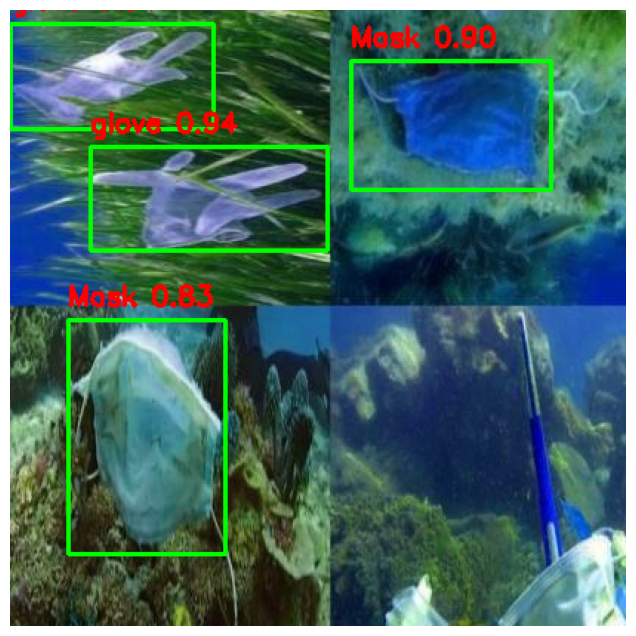

Output image saved to: output_image.jpg


In [ ]:
model = YOLO("/content/runs/detect/underwater_waste_v2/weights/best.pt")

import cv2
import matplotlib.pyplot as plt

def predict_and_visualize(image_path, save_path=None):
    # Run inference
    results = model.predict(image_path, conf=0.5, save=False)

    # Plot results
    img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    for box in results[0].boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cls_id = int(box.cls[0])
        conf = box.conf[0].item()

        # Draw bounding box
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        label = f"{model.names[cls_id]} {conf:.2f}"
        cv2.putText(img, label, (x1, y1-10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    # Display the image
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Save the output image if save_path is provided
    if save_path:
        img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Convert back to BGR for saving
        cv2.imwrite(save_path, img_bgr)
        print(f"Output image saved to: {save_path}")

# Test on a new image (replace with your image path)
predict_and_visualize("/content/drive/MyDrive/Dataset/test/images/gloves_in_the_ocean43_jpg.rf.0a1cdccdb77862714ab2d69151864825.jpg", save_path="output_image.jpg")

In [ ]:
import locale
locale.getpreferredencoding = lambda: 'UTF-8'

# Now run your zip command
get_ipython().system('zip -r /content/file.zip /content/runs')

updating: content/runs/ (stored 0%)
updating: content/runs/detect/ (stored 0%)
updating: content/runs/detect/underwater_waste_v2/ (stored 0%)
updating: content/runs/detect/underwater_waste_v2/confusion_matrix_normalized.png (deflated 16%)
updating: content/runs/detect/underwater_waste_v2/results.csv (deflated 57%)
updating: content/runs/detect/underwater_waste_v2/labels_correlogram.jpg (deflated 35%)
updating: content/runs/detect/underwater_waste_v2/val_batch0_labels.jpg (deflated 8%)
updating: content/runs/detect/underwater_waste_v2/val_batch0_pred.jpg (deflated 8%)
updating: content/runs/detect/underwater_waste_v2/val_batch2_pred.jpg (deflated 7%)
updating: content/runs/detect/underwater_waste_v2/train_batch0.jpg (deflated 3%)
updating: content/runs/detect/underwater_waste_v2/train_batch1.jpg (deflated 3%)
updating: content/runs/detect/underwater_waste_v2/results.png (deflated 7%)
updating: content/runs/detect/underwater_waste_v2/val_batch1_pred.jpg (deflated 8%)
updating: content/ru